# **Assignment Instructions:**

1. Read all Instructions carefully provided for each question before beginning your work.

2. Analyze each question thoroughly and document your result, analysis, and solutions within the Google Colab notebook itself.


3. This is an individual assignment. Your work should be original. Copying from peers or online sources is strictly prohibited.

4. The use of AI tools like ChatGPT, Copilot, Gemini, LLMs or any other automated code generation tools for writing code is strictly forbidden. We will be taking your Viva for evaluating the assignment.

5. Clearly document your code with comments and explanations so that it is easy to understand your approach and thought process. It is ok to take help from some external tutorial; however cite it in your documenation otherwise it will be considered plagiarism.

6. Follow the submission guidelines strictly. Make sure your notebook is well-organized and includes all necessary code, explanations, and outputs.

7. **Once you submit your assignment, a viva will be taken to evalute you.
For the assignment submission you will have to download this colab notebook as .ipynb file, zip it and submit it via this form: https://forms.gle/7JU8AyLiXPSBwieQ7**
8. The name of the zip file should follow this format: "CS779-A1-[yourfirstname]-[yourlastname]-[rollno].zip" where you out you replace [yourfirstname] with your actual first name and same for [yourlastname] and [rollno]. If you fail to do this, then we will not able to recover your assignment from pool of assignments as the process is automated.

9. **The deadline for submission is August 26, 2025, 11:59 AM. Note that this is a strict deadline.**

10. The above form will close at the above mentioned deadline and no further solutions will be accepted either by email or by any other means.

11. Please create Hugging Face account (its free) at: https://huggingface.co/

12. For the purpose of this assignment, you will require hugging face token; check out the steps below.

13. If you have any doubt or get stuck in any problem, consult  TA's over Discord. It's better to take help of TAs than cheating.



#**Enter your details below:**

Full Name: CS779

Roll No: 007

Email: nlp.course.iitk@gmail.com



#Instructions for creating huggingface token



1. Create hugging face account and on the top right corner select your profile and click on settings.
2. On the left side of the screen click on "Acess Tokens" option then click on "Create Token" option.
3. Choose the "Write" option, give the name for the token and click on Create Token option.

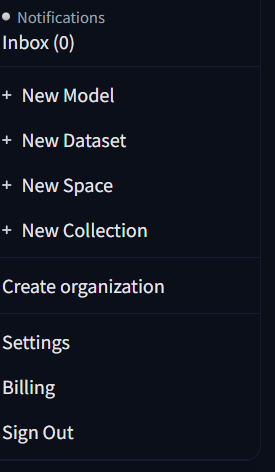
<br>
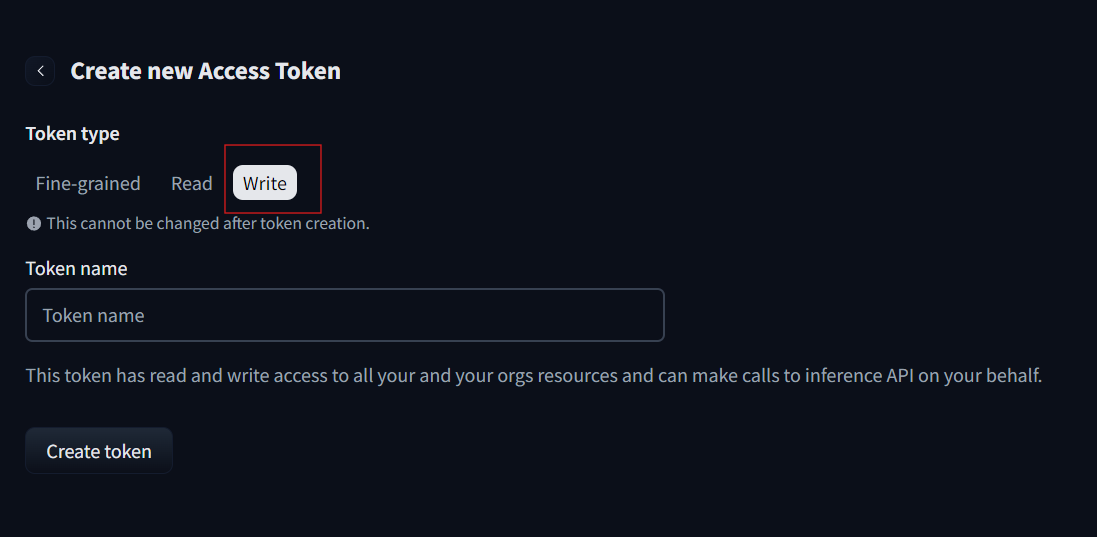

# Initial Setup
1. Install the `datasets` library made by huggingface to download and interact with the data. Install the `indic-nlp-library` which contains some relevant functions for processing Indian languages.
2. Import the `load_dataset` method from `datasets`
3. Copy and paste the huggingface token you generated above to start using the assingment data
4. The repository id of the data stored in https://huggingface.co/datasets/Exploration-Lab/CS779-Fall25
5. Import `nltk` (natural language toolkit) library for processing english language data.
6. English consists of many "stopwords" including the aritcles like "a", "an", "the" and joining words like "with", "and" etc. Typical NLP tasks filter out these "stopwords" as they do not carry significant meaning to understand the sentence. So let's download all the stopwords and keep them ready for use.

In [ ]:
!pip install datasets indic-nlp-library
!pip install --upgrade datasets
from datasets import load_dataset
# hf_token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx" # Put your huggingface token here
hf_token = ""
REPO_ID = "Exploration-Lab/CS779-Fall25" # this is the repository ID where the assignment data is stored

import nltk
nltk.download("stopwords")

import os
from collections import Counter

import pandas as pd
import numpy as np

import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

from tqdm import tqdm
tqdm.pandas()


# **Question 1: Zipf’s Law**








## Introduction

In this question, you will explore Zipf's Law by analyzing the frequency distribution of words in various languages, including English and 10 different Indian languages. Your task is to apply statistical analysis, plot frequency vs. rank curves, and derive insights from your findings.

## Objectives

- Understand and analyze Zipf's Law in the context of different languages.
- Implement methods to handle large corpora efficiently.
- Calculate the parameter "k" in the power-law relationship.
- Plot frequency vs. rank and log-log plots to visualize the relationship.
- Make detailed observations and interpretations of the results.

## Background: What is Zipf's Law?

Zipf’s Law states that in a large corpus of natural language, the frequency of any word is inversely proportional to its rank in the frequency table. This implies that frequency and rank are related by a power law.


Zipf's Law can be expressed as:
$$
f(r) = \frac{C}{r^k}
$$
Where:
- $ f(r) $ is the frequency of the word at rank $ r $.
- $ r $ is the rank of the word (1 for the most frequent word, 2 for the second most frequent, etc.).
- $ C $ is a constant that depends on the distribution of the frequencies.
- $ k $ is a parameter that decides the power law relationship.

For example, for some given constant "$k$", the most frequent word will appear roughly twice as often as the second most frequent word. The second most frequent word will appear approximately three times as often as the third most frequent word, and so on.



## **Question 1: Analyzing Zipf’s Law Across Multiple Languages**

## Instructions and Guidelines
We will be developing a modular code for solving Question 1. Hence you will have to fill in the missing code pieces and at the end of Question 1 there would be a `main` function that would call all the relevant functions to solve the tasks given below.

Importing relevant libraries.

In [ ]:
import math
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
from collections import defaultdict

### 1. Dataset and Language Selection [100 marks]

You are provided with datasets for multiple languages (Dataset is available  on [huggingface](https://huggingface.co/datasets/Exploration-Lab/E-Masters-EE958/tree/main/indic-corpus)), comprising of English and 10 Indian languages.
**Tasks**
1. Load the dataset for each language from huggingface
2. Preprocess the text to tokenize it into words. Ensure that you properly handle different languages using appropriate tokenizers like those available in the Indic library. Feel free to refer to the [documentation](https://anoopkunchukuttan.github.io/indic_nlp_library/) to write the code stubs in the following sections.

In [ ]:
indic_dataset = load_dataset(REPO_ID, name="indic-corpus", token=hf_token, split="train")
indic_dataset

### 2. Word Frequency Analysis [50 marks]

Once you have tokenized the text:

- **Task**: Calculate and store (using appropriate data-structure) the frequency of each word in the corpus.

### 3. Word Frequency Analysis (Contd.) [50 marks]

- **Task:** Rank the words in the reverse order of their frequencies. Hence the most popular word should be first and the least popular word should be last

### 4. Plotting Zipf's Law Curves [100 + 100 marks]

You are required to plot two types of curves:

1. **Rank vs Frequency Curve**:
   - **Task**: Rank the words by their frequency and plot a graph with the rank on the x-axis and the frequency on the y-axis.
   
2. **Log Rank vs Log Frequency Curve**:
   - **Task**: Transform the ranks and frequencies to their logarithmic (natural logarithm) values and plot a graph with log rank on the x-axis and log frequency on the y-axis.
   
   - This plot will help you observe the linear relationship that typically characterizes Zipf’s Law.



### 5. Finding the Parameter "k" [100 marks]

Zipf's Law involves a parameter "k" that characterizes the steepness of the frequency distribution curve.

- **Task**:  From the log-plot calculate the value of $ k $ for each language. (HINT: you could use linear regression on log plot.)



### 6. Observations and Interpretations [20 + 20 + 20 + 20 marks]

- **Task**: Write a detailed observation for each language, addressing the following points:
  - How closely does the word frequency distribution follow Zipf’s Law?
  - What are the values of $ k $ for each language? Are they close to 1?
  - Compare the distributions across different languages. Are there any noticeable differences or patterns?
  - Discuss any challenges you faced, especially with large corpora, and how you overcame them.


### `main` function

The `main` function calls all the other functions above to analyse the data and develop the plots for results and observations.

Try to change the language and see how the results vary.

Reference table for language IDs:

| ID | Language |
| -- | -------- |
| 0  | Assamese |
| 1  | Bengali  |
| 2  | English  |
| 3  | Gujarati |
| 4  | Hindi    |
| 5  | Kannada  |
| 6  | Marathi  |
| 7  | Odia     |
| 8  | Punjabi  |
| 9  | Tamil    |
| 10  | Telugu   |

In [ ]:
def main():

    indic_dataset = load_dataset(REPO_ID, name="indic-corpus", token=hf_token, split="train")
    print(indic_dataset["lang_id"]) # Checkout the output of this line to get all the availble languages
    language = 'Hindi'
    language_index = 4
    process_Corpus(indic_dataset, language, language_index)
if __name__ == "__main__":
    main()

### 7. Reporting Results

Compile your results, including the plots and observations.
- Make sure you write all observations in a clear, well-organized manner, thoroughly explaining your methodology, findings, and conclusions. Include your plots, the calculated values of $ k $, and any insights or anomalies you observed.

Here are some reading resources for Zipf's law : \[link text](https://)
https://en.wikipedia.org/wiki/Zipf%27s_law \
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/

Dataset : 'Indic-Language-Dataset/train.as' for assamese, similarily the dataset for all the languages is in folder Indic-Language-Dataset.

# **Question 2, 3 : REGEX**

## Introduction:
In this question, you will explore how to find various patterns in text using regular expressions (regex). These patterns could further be useful to extract various kinds of information that could be part of a larger application.

## Problem Description:

You will analyzing a corpus of emails. In particular, we will be looking at ENRON Corpus (https://en.wikipedia.org/wiki/Enron_Corpus). Besides the email text, the corpus has phone numbers, emails, URLS, etc. embedded in the email text. You are required to build a regex-based tokenizer and subsequently, calculate statistics related to each word, phone numbers, email-id, and URLs. These statistics can then be visualized using various plots.

## What are Regular Expressions?
Regular expressions (regex or regexp) (https://en.wikipedia.org/wiki/Regular_expression) are powerful tools for finding or matching patterns in strings. They allow you to define specific patterns and search for characters or words within text.


## Regular expressions in Python
Python has a built-in package called `re` (https://docs.python.org/3/library/re.html), which can be used to work with Regular Expressions. Using this module, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways.

## Rules

Regular expressions can contain both special and ordinary characters. Most ordinary characters, like `'A'`, `'a'`, or `'0'`, are the simplest regular expressions; they simply match themselves. You can concatenate ordinary characters, so `last` matches the string `'last'`.

Some characters, like `'|'` or `'('`, are special. Special characters either stand for classes of ordinary characters, or affect how the regular expressions around them are interpreted.


Here’s a complete list of the metacharacters;

`. ^ $ * + ? { } [ ] \ | ( )`



You can follow this cheatsheet while constructing regular expressions, it's available on `pythex.org`:

![regex-cheatsheet](https://i.imgur.com/XnEvz1z.png)

You can read more about them here: https://docs.python.org/3/library/re.html


## Performing Matches

Once you have an object representing a compiled regular expression, what do you do with it? Pattern objects have several methods and attributes. Only the most significant ones will be covered here; consult the `re` docs for a complete listing.

![match](https://i.imgur.com/gkKOxJO.png)


`match()` and `search()` return `None` if no match can be found. If they’re successful, a match object instance is returned, containing information about the match: where it starts and ends, the substring it matched, and more.

You can learn about this by interactively experimenting with the `re` module.

Learn more about this here: https://docs.python.org/3/howto/regex.html#performing-matches



### **Tips for Writing Regular Expressions**

- **Start Simple**: Begin with basic patterns and gradually add complexity.
- **Use Metacharacters Wisely**: Characters like `.` (any character) and `*` (zero or more) can be very powerful but may lead to unintended matches.
- **Escape Special Characters**: If you need to match characters that have special meanings in regex (like `.` or `*`), use a backslash (`\`) to escape them.
- **Test Regularly**: Use online tools like [pythex](https://pythex.org/) to test your regex patterns before using them in your code.
- **Break Down Complex Patterns**: If you’re building a complicated regex, break it down into smaller, manageable pieces and test each part.


## Sites where you can learn more about regex

1. https://docs.python.org/3/library/re.html
2. https://docs.python.org/3/howto/regex.html#regex-howto
3. https://www.w3schools.com/python/python_regex.asp
4. https://developers.google.com/edu/python/regular-expressions
5. Site for testing regex: https://pythex.org/










**Example of Regular Expressions For Email**

To extract an email address from text using a regular expression, you need to define a pattern that matches the structure of an email address. Here's an explanation of a commonly used regex pattern for emails:

Regex Pattern for Emails: `[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}`


*Explanation*
- `[a-zA-Z0-9._%+-]+`: This part of the pattern matches the username part of the email.
  - **`[a-zA-Z0-9._%+-]`** specifies the allowed characters in the username, which include:
    - **`a-z`** and **`A-Z`**: Letters (both uppercase and lowercase).
    - **`0-9`**: Numbers.
    - **`.`**, **`_`**, **`%`**, **`+`**, **`-`**: Special characters often allowed in email usernames.
  - The **`+`** after the brackets means "one or more" of these characters.

- **`@`**: This matches the "@" symbol, which separates the username from the domain.

- **`[a-zA-Z0-9.-]+`**:
  - This part matches the domain name (e.g., `example` in `example.com`).
  - It includes:
    - **`a-z`** and **`A-Z`**: Letters.
    - **`0-9`**: Numbers.
    - **`.`** and **`-`**: Dots and hyphens, which are commonly used in domain names.
  - Again, the **`+`** means "one or more" of these characters.

- **`\.[a-zA-Z]{2,}`**:
  - This part matches the top-level domain (e.g., `.com`, `.org`).
  - **`\.`** matches the dot before the domain extension.
  - **`[a-zA-Z]{2,}`** matches two or more letters, representing common domain extensions like `.com`, `.org`, or `.edu`.

Example Matches:
This regex pattern will match email addresses like:
- `john.doe@example.com`
- `user.name+alias@sub.domain.org`
- `contact_us@service-provider.net`

This pattern ensures that it captures most standard email formats while being flexible enough to accommodate different valid email structures.

Similarly, you can write patterns for Phone Number and URLs.

### Instuctions and Guidelines
Similar to Question 1. We will be looking at a set of functions that are inter-connected and you will have to fill in the missing pieces of code. The `main` function at the end of the question connects all the functions.

## **Question 2: REGEX Based Extractor**


1.   Download the ENRON Corpus from Hugging Face and analyze the corpus. Observe the format of emails, phone numbers and URLs.



In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
from datasets import load_dataset

def load_data():
    """
    Loading the data from huggingface

    Returns: a dataframe containing the text from wikipedia mini corpus.
    (Follow the huggingface links)
    """
    # Load the dataset from huggingface using the REPO_ID, name="email-corpus", token=hf_token, split="train"
    email_dataset = load_dataset(REPO_ID, name="email-corpus", token=hf_token, split="train")

    df = email_dataset.to_pandas()
    len_df = len(df)

    # Let's take only a small part of the complete training data to reduce time in running the below code.
    # If you are selecting a part of the data randomly then please set the seed to 42 (so that the results are reproducible)
    df = df.sample(frac=1.o, random_state=42)
    return df

dataframe = load_data()
dataframe.head()

2. **Extracting words, email, phone and URLs using regex**
   **[20 + 20 + 20 + 20 marks]** Write regular expression patterns for extracting words, email, phone number and URLs.



3. **[100 marks]** Extract words, emails, phone numbers and URLs by firing the patterns against the corpus. Collect counts for each (words, emails, phone numbers and URLs).

3. (Contd.) Additional tasks
- Write the code to get the top `n` items from the frequency dictionary you made above.
- Write the code to create a list for all the items (words, emails, phone, url and date) using the output of `top_n_items()`

Code to plot all the items for analysis

4. **[20 + 20 + 20 + 20 marks]** ***Visualization***:
    - Plot the histogram of frequency vs top-200 words.
    - Plot the histogram of frequency vs top-200 email
    - Plot the histogram of frequency vs top-200 phone-number.
    - Plot the histogram of frequency vs top-200 URLs.
    
    - What are your key observations?


5. **[20 marks]** ***Word Frequency Analysis***:
   - After extracting all the words from the text, what are the top 5 most frequent words? Why do you think these words appear so often?

6. **[20 marks]** ***Phone Number Patterns***:
   - Analyze the phone numbers extracted. Do they follow a consistent format, or do they vary? What could be the reason for the variation?

7. **[20 + 20 marks]** ***Email Analysis***:
   - What are the most common domain extensions (.com, .org, etc.) found in the extracted emails? What might this indicate about the types of organizations or individuals in the dataset?
   - Are there any email addresses with unusual patterns or special characters in the username? How does the regex pattern account for these cases?





8. **[20 + 20 marks]** ***URL Structure Analysis***:
   - How many of the extracted URLs use `https` versus `http`? What does this indicate about the security practices of the sites referenced in the documents?
   - Identify the most common top-level domain (TLD) in the extracted URLs (e.g., .com, .org, .edu).

## **Question 3: Playing with Wikipedia**


## Introduction:

In this question, you will get faimilar with spaCy libray (https://spacy.io/). For this purpose, you will be using English Wikipedia corpus as your test-bed.

#### Sites to Learn about Spacy:
1. https://spacy.io/usage/spacy-101
2. https://course.spacy.io/en/
3. https://course.spacy.io/en/

Download the English Wikipedia Corpus from provided hugging face repo (`REPO_ID = "Exploration-Lab/CS779-Fall25"`).

## Instructions:

In this guide, we will explore how to analyze the English Wikipedia Corpus using spaCy, a powerful NLP library in Python.

## Step 1: Setting Up the Environment
Before starting, ensure you have Python and the necessary libraries installed, particularly SpaCy and its English language model. SpaCy is an NLP library that offers tools for tokenization, POS tagging, and Named Entity Recognition (NER).

## Step 2: Loading the Wikipedia Corpus
The first step is to load the English Wikipedia Corpus. You can access this dataset from the provided Hugging Face repository. The corpus contains a vast collection of articles from Wikipedia, which serves as a rich resource for NLP analysis. Note that the corpus is in the Apache "Paraquet" format. You can also check out the file via command line using paraquet-tools utility (https://pypi.org/project/parquet-tools/).



**Handling Large dataset**

If the computational resources in Colab are unable to handle the dataset, implement a chunking strategy to read the data in smaller portions . This approach will help you manage memory efficiently while still processing the entire corpus.





\Download the English Wikipedia Corpus from provided hugging face repo (`REPO_ID = "Exploration-Lab/CS779-Fall25"`).

In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
from datasets import load_dataset, Dataset

def load_data():
    """
    Loading the data from huggingface

    Returns: a dataframe containing the text from wikipedia mini corpus.
    (Follow the huggingface links)
    """

    # Download the Parquet file
    dataset = load_dataset("Exploration-Lab/CS779-Fall25", "default", token=hf_token, split="train")
    dataset = dataset.to_pandas()
    dataset = dataset.sample(frac=1.0, random_state=42)
    dataset = Dataset.from_pandas(dataset)
    return dataset
dataset = load_data()

## Step 3: Corpus Analysis **[10 + 10 + 20 + 20 + 50 marks]**
Read the file and check out how wiki articles are organized in the file (Hint: there is one article per row).

### 1. Find the number of Wikipedia articles in the corpus:





### 2. Analyze the pattern used for sub-headings and extract them using regex:
As you would have observed, that in any Wikipedia article, there are sub-topics which are separated by a sub-heading for example, sub-headings like "History", "Career," etc). Analyze each article, find out how these sub-headings are present in the text of each article, i.e., what type of pattern is used to demark sub-heading. Formulate a regex pattern to extract all these sub-heading titles. NOTE: You can ignore the hierarchy and assume that a sub-sub-heading as a sub-heading.

### 3. Extract sub-headings and their content, then create a new dataset:
Using regex now extract sub-heading for each article, along with the text **bold text**(content) that goes under ONLY that sub-heading. Using the extracted data ceate a new dataset and store it (in a suitable format, e.g., JSON format); if you stored it in the form of table then each row corresponds to an article and various columns correspond to text corresponding to various sub-headings within the article. The first column would be article number (this corresponds to **row** number in the original wiki dataset in paraquet file). The second column could be just the part in the beginning of the article (this may not have a sub-heading). Each sub-heading content should have a title which is the actual sub-heading title.

### 4. Find the article with the maximum and minimum number of sub-headings:
Based on the new dataset, find out the maximum number of sub-headings in an article, which article is it? Similarly find out article with minimum number of sub-heading. Can you guess the title of the article corresponding to maximum and minimum sub-headings?

### 5. **Challenge Question**: Extract Categories from Articles, Create a Table with Article Number and Categories, and Generate Titles Based on Categories
From the original dataset file, can you find out the category(ies) of each article? Make a table having columns article number and category(ies). Based on the category(ies) can you come up with a scheme to have a title (name) of the article? HINT: No need to use a ML model for this and maybe you might want to make use of the information about TF-IDF given in question 5.1.

## Step 4: Tokenization **[50 + 10 + 10 + 10 + 10 + 20 + 10 + 20 + 20 + 20 + 10 + 100 + 100 + 50 marks]**
Tokenization involves breaking down the text into individual units, called tokens. These tokens are typically words, but they can also be punctuation marks, numbers, or other significant elements of the text. In the context of this question, tokenization helps in processing the text at a granular level, making it easier to analyze each word separately. Note that data also contains meta-information in form of sub-headings, categories, etc; you should filter this out.

1. Let each wiki article be called a document. Using spaCy tokenize each document. Keep a track of number of tokens in each document. Let's define **Length of a Document** as number of tokens in it. Note when calculating length of a document, you should make sure that sub-headings, categories and other meta-information is filtered out, since these are not necessarily a token of a document.  


### 1. Tokenization and Length Calculation with Tokens Display

### 2,3. Find Longest and Shortest Documents
- Find out the longest document. What is it's length?
- Find out the shortest document. What is it's length?

### 4. Average Length of Documents
Find out the average length of document in the Wikipedia corpus.

### 5. Most Frequent Token
What is the most frequent token in the corpus?

### 6. Histogram of Frequency vs Tokens 200
Draw a histogram of frequency vs tokens for top 200 tokens in the corpus.

### 7.  Percentage of Punctuation Marks
What percentage of the total tokens are punctuation marks? What does this indicate about the nature of the text in the corpus?

### Interpretation of Punctuation Percentage




### 8. Normalized Frequency
Calculate normalized frequency of each token in the corpus. Normalized frequency is defined as frequency of a token in a document divided by its length.

### 9. Most frequent token based on normalized frequency
What is the most frequent token based on noramalized frequency?

### 10. Histogram of Normalized Frequency vs Tokens
Draw a histogram of normalized frequency vs tokens for top 200 tokens in the corpus.


### 11. Comparison of Frequency and Normalized Frequency Histograms

Are the histogram plots of frequency and normalized frequency same? What do you observe? How do things change and why?

### Frequency Histogram
- **Description:**

### Normalized Frequency Histogram
- **Description:**

### Observation
-




### 12. Unigram Probability
**Unigram Probability of Token in Corpus:** Let's approximate  the probability of a token in a corpus by a unigram, i.e., probability of a token $w_{i}$ is given by:

$p(w_{i}) = \frac{C_{w_{i}}}{\sum_{j = 1}^{N} C_{w_{j}}}$

where, $C_{w_{i}}$ is the count of token $w_{i}$ in the entire corpus.

Calculate the probability of all tokens in the corpus and store in a suitable datastructure


Q: Is unigram a fair assumption?

A:

Q:What is the problem of Unigram approach?

A:

### 13. Probability of a Document
**Probability of a Document:** We can make I.I.D. (Indepedent and Identically Distributed) assumption over tokens present in the document and approximate the probability of a document $D$ having tokens $w^{(D)}_{1}, w^{(D)}_{2},\ldots, w^{(D)}_{L}$ as:

$p(D) = \prod_{i = 1}^{L} p(w^{(D)}_{i})$

**Tasks:**
- Pick up 10 documents at random and calculate the probability of each of them.
- What do you observe? (Hint: do you see any underflow or overflow problems?)
  - Answer:

### 14. Log Probability of a Document
**Log Probability of a Document:** Calculate the log probability of the above selected 10 documents, i.e., $log\ p(D)$. What do you observe? Are results more interpretable than the previous method?

### **Observations and Interpretation**


### Additional Comments
Answer:


## Step 5: Part-of-Speech (POS) Tagging [50 + 20 + 100 + 100 + 50 + 20 marks]

After tokenization, the next step is POS tagging, which involves labeling each token with its corresponding part of speech, such as noun, verb, adjective, etc. POS tagging is crucial for understanding the grammatical structure of the text. For example, knowing whether a word is a noun or a verb can provide insights into its role in the sentence.







### 1. POS Tagging for Each Token
Use spaCy to find out POS tag for each token in each document. NOTE POS tag will be only for a real token and not meta-information, so you might have to filter meta-info out when predicting POS tags.

### 2. Frequency of Each POS Tag and Histogram

Once you've tagged all the tokens, you can analyze the frequency of each POS tag across the corpus. Creating a histogram of POS tags will help visualize the distribution, showing which types of tags (e.g., nouns, verbs) are most common in the text.

### 3. Unigram Probability of POS Tags in a Document

**Unigram Probability of a POS Tag in a Document:** Let's approximately calculate the probability of a POS tag in a document. One way is to calculate unigram probability, i.e., consider set of POS tags = ${t_{1}, t_{2}, \ldots, t_{T}}$, then probability of a POS tag $t_{i}$ is given by:

$p(t_{i}) = \frac{C_{t_{i}}}{\sum_{k = 1}^{T} C_{t_{k}}}$

where $C_{t_{i}}$ is the count of POS tag $t_{i}$ in the entire document. Pick up 10 documents randomly and calculate the probability of each of the POS tag and plot the distribution in the form of a histogram.



### 4. Entropy of POS Tag Distribution

**Entropy Of POS Tag Distribution in a Document:** Calculate the entropy of the POS tags distirbution for each of the selected documents above. Entropy of a discrete distribution is given by:

$H(p) = - \sum_{i=1}^{N} p_{i} log p_{i}$

where the distribution $p$ has non-zero support at $N$ points.

### 5. Observations
Do you observe any correlation between distribution of POS tags and article categories? Do certain type of articles have more well distributed POS tags or have a peaky POS tag distribution? Can you relate this to the Entropy of the disribution? Describe your findings and observations.


### 6. Unigram Assumption Validity

In the probability calcualation for POS tag we made a unigram assumption but is it correct? What should have been a more valid formulation? How does it effect the answer to the previous question?

## Step 6: Building a Dictionary of Words to POS Tags [100 + 100 + 100 + 20 + 20 marks]


Now that you have both tokens and their corresponding POS tags, the next step is to build a dictionary that maps each word to the set of POS tags it appears with in the text. This dictionary is useful for analyzing the versatility of words—some words can serve in multiple grammatical functions, depending on the context.

After building this dictionary, you can identify the words with the most varied POS tags. These are typically words that are highly versatile, such as "run," which can be both a noun ("a long run") and a verb ("I run every day"). Conversely, some words have only one POS tag and are less flexible in their usage. Identifying these can also be insightful.

1. Calculate the Unigram POS Tag probabilities but at corpus level (NOT at document level as done above).
2. For each token find out the probability distribution of POS tags.
3. Calculate the POS tag entropy for each token.
4. Find out the token with highest entropy; what could be the possible reason for such high entropy?
5. Find out the token with lowest entropy; what could be the possible reason for such low entropy?


### Building the Dictionary

### Words with Most and Least Varied POS Tags

### 1. Calculate Unigram POS Tag Probabilities at Corpus Level
Calculate the Unigram POS Tag probabilities but at corpus level (NOT at document level as done above).

### 2. Calculate Probability Distribution of POS Tags for Each Token
For each token find out the probability distribution of POS tags.

### 3. Calculate POS Tag Entropy for Each Token
Calculate the POS tag entropy for each token

### 4,5. Token with the Highest and Lowest Entropy

4. Find out the token with highest entropy; what could be the possible reason for such high entropy?
5. Find out the token with lowest entropy; what could be the possible reason for such low entropy?



### 4,5 Interpretation:


## Step 7: Named Entity Recognition (NER) [ 50 + 100 + 100 + 20 + 20 marks]

NER is a process where you identify and classify named entities within the text, such as people, locations, organizations, dates, and more. spaCy provides pre-trained models that can recognize these entities with high accuracy.

Once you’ve extracted the named entities, you can analyze the distribution of different types of entities. For instance, you might find that locations are mentioned more frequently than organizations, or that dates are a common entity type in your text. Visualizing this data with a histogram can provide a clear picture of what types of entities dominate the corpus.

1. Using spaCy predict the NER tag for each token in each document.
2. Calculate Corpus-wide Unigram NER Tag Probability distribution.
3. Calculate the NER entropy of each document.
4. Which type of documents have the highest NER entropy? What could be the possible reason for this.
5. Which type of documents have the lowest NER entropy? What could be the possible reason for this.

### 1. Using spaCy to Predict NER Tags for Each Token

### 2. Calculate Corpus-wide Unigram NER Tag Probability Distribution

### 3. Calculate the NER Entropy of Each Document

### 4. Documents with the Highest NER Entropy

### 5. Documents with the Lowest NER Entropy

### 4,5. Interpretation:



# **Question 4 : N-Gram models**

Language models are statistical models that give out the probability distribution of a sentence (sequence of tokens). They rely on the joint probability distribution of the tokens in the sentence.

For example, let us calculate the probability of the sentence "Monza is a fast track on the F1 GP". Then the probability of the sentence is given as:
$$
P = P(\text{<s>Monza is a fast track on the F1 GP</s>})
$$
Where `<s>` and `</s>` are predefined start and end tokens respectively.

We can then divide the sentence into tokens and use the chain rule of probability to make the calculations easier.
$$
P = P(\text{Monza|<s>}).P(\text{is|<s>Monza}).P(\text{a|<s>Monza is}).P(\text{fast|<s>Monza is a}) ... .P(\text{</s>|<s>Monza is a fast track on the F1 GP})
$$

Learning the joint probability distirbution is much more difficult and hence usually we have Markov Assumption (https://en.wikipedia.org/wiki/Discrete-time_Markov_chain). The main idea is the current token only depend on the previous token and you can ignore the history before the previous token. Given the Markov Assumption, we have:

$$
P(\text{is|<s>Monza}) = P(\text{is|Monza}) \\
P(\text{a|<s>Monza is}) = P(\text{a|is}) \\
P(\text{fast|<s>Monza is a}) = P(\text{fast|a}) \\
... \\
P(\text{</s>|<s>Monza is a fast track on the F1 GP}) = P(\text{</s>|GP})
$$

Hence, we can write the probability of the complete sentence as

$$
P(\text{<s>Monza is a fast track on the F1 GP</s>}) = \\P(\text{Monza|<s>}).P(\text{is|Monza}).P(\text{a|is})...P(\text{</s>|GP})
$$

Above we made 1st order Markov Assumption, giving us a **BiGram Language Model**. Similarly, we can make $(n-1)^{st}$ order Markov assumption, giving us  **n-gram Language Model**

In general using n-gram model, the probability of a sentence $s$ is given as:
$$
P(s) = \prod{P(w_n|w_{1} w_{2} w_{3} w_{4} ... w_{n-1})}
$$

Can you think and write down the sentence probability  expression for a unigram model?

#### Reading Materials
N-gram language models refer to language models that work on n-tokens simultaneously. Here are some reading resources to learn about n-gram language models:
- https://web.stanford.edu/~jurafsky/slp3/3.pdf
- https://web.cs.hacettepe.edu.tr/~ilyas/Courses/CMP711/lec03-LanguageModels.pdf

-----------------------------






## **Question 4: N-Gram models**

**TASK**: We aim to create a n-gram model using POS tags of each input text sequence. Then we predict the probability of a new sentence based on its POS tags.

**OBJECTIVE**: Learn to build unigram, bigram and trigram language models. Usually this method is applied to sequence of words, but here we want a n-gram language model built on the POS tag sequence. In particular, we will be developing POS n-gram model for Wikipedia corpus.

We will be using the same wikipedia corpus as in the previous question, hence we can reuse some of the things from the previous question.

#### Instructions:
This code is similar to Question 1 and 2 where we will develop multiple functions individually and connect them to each other using the `main` function at the end of the question.

In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
from datasets import load_dataset, Dataset

def load_data():
    """
    Loading the data from huggingface

    Returns: a dataframe containing the text from wikipedia mini corpus.
    (Follow the huggingface links)
    """

    # Download the Parquet file
    dataset = load_dataset("Exploration-Lab/CS779-Fall25", "default", token=hf_token, split="train")
    dataset = dataset.to_pandas()
    dataset = dataset.sample(frac=1.0, random_state=42)
    dataset = Dataset.from_pandas(dataset)
    dataset = pd.DataFrame(dataset)
    return dataset
dataset = load_data()

In [ ]:
dataset

## Step-1: POS Tag Sequence:
Using spaCy predict POS tag for each token in every document in the corpus.




## Step-2: POS Tag Unigram, Bigram and Trigram Probabilities: **[500 + 50 + 20 + 60 + 10 + 20 marks]**

Compute unigram, bigram and trigram probabilities.
1. Have pass over the corpus collecting and updating unigram, bigram and trigram counts. Using counts calculate unigram, bigram and trigram probabilities. For example, bigram probability is given by:

$p(w_{i+1} = t \mid w_{i} = t^{'}) = \frac{C(w_{i+1} = t, w_{i} = t^{'})}{\sum_{k \in V} C(w_{i+1} = k, w_{i} = t^{'})}$

Here, $V$ is the vocabulary of POS tags and $C(w_{i+1} = t, w_{i} = t^{'})$ is the count of $(t, t^{'})$ co-occurring together.

2. Can you prove the above probability formula for bigram and similarly prove the probability formula for tri-gram.

3. Find the most frequent unigrams, bigrams and trigrams
4. Plot the bar charts of the 10 most frequent unigrams, bigrams and trigrams
5. Do you observe any interesting patterns in the plots?
6. Do you see any repeated tags in unigram, bigram trigram frequencies? If so, then what do you make of it?



## Step-3: Sentence Probability: **[100 + 100 marks]**

1. Pick up 1000 random sentences from the corpus. Calculate the sentence probability separately using unigram, bigram and trigram POS tag models. What do you observe? Is the probability same for unigram, bigram and trigram model?
2. Given a sentence such as **"Lewis Hamilton versus"** can you predict the next POS tag that can come after versus. Try to predict separately with using unigram, bigram and trigram models. Which model gives the best prediction?

Given the reliance of n-gram models on the presence of sequential tokens in the training data, there exists a situation where the queried n-gram is not present in the training data. For example, `[DET, NOUN, PRONOUN]` is a trigram sequence that is not there in the trigram model or in the training data then how can one calculate the sentence probability? Now we look at 2 popular methods to handle this situation.

1. **Backoff Model:** When predicting the sentence probability of a target sentence using an n-gram model we can switch to an (n-1)-gram model if the queried sequence is not there in the n-gram model. For example, if `[DET, NOUN, PRONOUN]` is not a part of the tri-gram model we can predict the probability of the above phrase by taking the product of the bi-gram probabilities of `[DET, NOUN]` and `[NOUN, PRONOUN]`. In a backoff-model one can keep repeating this process till we reach a uni-gram model. However, backoff is only applied to the n-gram sequence that is not found in the n-gram model, while the probability of the rest of the sequence is calculated as is. Please refer to [Lecture-3 Language models](https://web.cs.hacettepe.edu.tr/~ilyas/Courses/CMP711/lec03-LanguageModels.pdf) for a deeper understanding of backoff models.
2. **Smoothing:** When calculating the n-gram sequence probabilty of new/unknown (not part of training data or model) sequence, we can replace $0$ with a value $\epsilon << 1$, to prevent the probability from collapsing to $0$. This method is called smoothing.

# **Question 5: Topic Classification**




The purpose of this question is to develop a model for perfoming topic classification over wikipedia articles. We will be using two major techniques: kNN based and k-Means based.

In this problem you will implemnent K-Nearest Neighbors (KNN) with Term Frequency-Inverse Document Frequency (TF-IDF) vectors for text classification. This guide will walk you through the process of using KNN for text classification, and provide you with detailed instructions and guidelines for your implementation.

## Objectives

- Understand the TF-IDF vectorization method for text data.
- Implement the KNN algorithm from scratch for classification.
- Experiment with different values of `k` and evaluate classifier performance.

## 1. Introduction to TF-IDF

**Term Frequency-Inverse Document Frequency (TF-IDF)** is a technique used to convert text documents into numerical feature vectors, capturing the importance of words within documents relative to a corpus (https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

### Key Components:

- **Term Frequency (TF):** Measures how often a term appears in a document.
  $$
  TF(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
  $$

- **Inverse Document Frequency (IDF):** Measures how important a term is by considering the rarity of the term across all documents.
  $$
  IDF(t, D) = \log \left(\frac{\text{Total number of documents in the corpus}}{\text{Number of documents containing the term } t}\right)
  $$

- **TF-IDF Calculation:** Combines TF and IDF values to produce a weighted score for each term in a document.
  $$
  TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)
  $$

## 2. Introduction to K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple, non-parametric algorithm used for classification and regression. It predicts the class of a data point based on the classes of its nearest neighbors (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

### Steps in KNN Classification:

1. **Distance Calculation:** Compute the distance between a test document and all training documents. The Euclidean distance is commonly used:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$

2. **Identify Neighbors:** Find the `k` closest training documents to the test document.

3. **Prediction:** Assign the most common class label among the `k` nearest neighbors to the test document.

## **Question 5.1: Classification using TF-IDF + K-Nearest Neighbors (KNN)**

## Starting Code


### Reading Materials

Tf-idf : https://en.wikipedia.org/wiki/Tf%E2%80%93idf  \
KNN :https://www.elastic.co/what-is/knn   \
KD Tree: https://www.baeldung.com/cs/k-d-trees   \
Ball Tree: https://en.wikipedia.org/wiki/Ball_tree   \
ANN: https://ignite.apache.org/docs/latest/machine-learning/binary-classification/ann     \
PCA: https://en.wikipedia.org/wiki/Principal_component_analysis  \
t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#tsne

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial import distance

### Data Preparation **[200 marks]**
1. **TF-IDF Vectorization:** Represent each document using a TF-IDF vector. Essentially, each document can be represented as vector where index of each element corresponds to index in the  vocabulary/dictionary and it's value corresponds to TF-IDF value of the corresponding token. If your dataset is large, consider using efficient vectorization techniques or libraries.

### KNN Implementation **[20 + 500 marks]**

1. **Calculate Distances:** Implement a function to compute the distance between TF-IDF vectors. Ensure you handle vector normalization if needed.

2. **Predict Labels:** Develop a function that uses the k-nearest neighbors to classify a test document. This involves finding the nearest neighbors and determining the most common class label. Note if you do comparisons in brute-force manner it may result in $O(N^2)$ complexity which may not be scalable.


In [ ]:
def main():

    dataset = load_dataset(REPO_ID, "wiki-topics", token=hf_token)
    train_df = dataset["train"].to_pandas().sample(frac=1.0, random_state=42).reset_index()
    test_df = dataset["test"].to_pandas().sample(frac=1.0, random_state=42).reset_index()

    # Vectorize the text using TF-IDF
    X_train, X_test, _ = vectorize_text(train_df['text'], test_df['text'])
    y_train = train_df['category'].values
    y_test = test_df['category'].values

    # Define the range of k values to test
    k_values = range(2, 10)

    # Evaluate the KNN classifier with different k values
    accuracy_scores, f1_scores = _____

    # Plot Accuracy and F1-Score vs k
    plot_metrics(k_values, accuracy_scores, f1_scores)

if __name__ == "__main__":
    main()

### Experimentation and Optimization **[300 + 600 + 100 + 800 marks]**

1. **Testing Different Values of `k`:** Experiment with different values of `k` (2, 10) and observe how they affect the classification performance. Compute the following performance metrics: accuracy, precision, recall, and F1-score (see https://en.wikipedia.org/wiki/Precision_and_recall) for each value of `k`. Plot accuracy vs `k` and F1-score vs `k` curves. What are your main observations?

2. **Distance Metrics:** Above you already tried euclidean distance, try out different distance metrics such as  Manhattan (https://en.wikipedia.org/wiki/Taxicab_geometry), and Cosine similarity (https://en.wikipedia.org/wiki/Cosine_similarity), to see how they affect classification results.

3. **Comparative Analysis:** Implement KNN using library functions (e.g., from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and compare the results with your implementation. Is there any differences in performance and efficiency.

4. **Optimizing k-NN for Large Datasets**

 Lets assume you have a large datasets, direct k-Nearest Neighbors (k-NN) can be computationally expensive. Consider implementing KNN using atleast two of the following techniques to improve efficiency. Let's follow the code below on Approximate nearest neighbours, KD trees and Ball trees to solve k-NN for large datasets. (You can think and implement some other techniques also)

### Approximate Nearest Neighbors (ANN):

ANN algorithms provide approximate nearest neighbors more quickly than exact methods. Techniques like Locality-Sensitive Hashing [LSH](https://www.pinecone.io/learn/series/faiss/locality-sensitive-hashing/) and libraries such as [Annoy](https://github.com/spotify/annoy) can be used.


### **[KD-Trees](https://en.wikipedia.org/wiki/K-d_tree)**
KD-Trees are data structures that partition data into k-dimensional spaces. They enable faster nearest neighbor searches by reducing the number of distance calculations needed.

### [Ball Trees](https://en.wikipedia.org/wiki/Ball_tree)

Ball Trees organize data points in a hierarchy of nested hyperspheres. They are particularly effective for high-dimensional data where KD-Trees might not be as efficient.

## **Question 5.2: Classification using TF-IDF + K-Means**

In this question, we will see how K-Means clustering (https://en.wikipedia.org/wiki/K-means_clustering) with Term Frequency-Inverse Document Frequency (TF-IDF) vectors can be used for text classification.

### Objectives
1. Understand the TF-IDF vectorization method for text data.
2. Implement the K-Means clustering algorithm for feature extraction.
3. Classify test data using cluster centroids and evaluate classifier performance.
4. Experiment with different numbers of clusters and compare your results with library-based approaches.


### 1. Introduction to K-Means Clustering

K-Means is a popular clustering algorithm used to partition data into k distinct clusters. Each cluster is represented by its centroid, which is the mean of all points assigned to that cluster.

**Steps in K-Means Clustering:**
- **Initialization:** Choose a value of k (this corresponds to number of clusters). This is a hyper-parameter that you need to experiment with.
- **Assignment:** Assign each data point to the nearest centroid.
- **Update:** Recalculate centroids as the mean of the points assigned to each cluster.
- **Iteration:** Repeat the assignment and update steps until centroids no longer change significantly.

Check these slides for implementation details: https://www.cs.toronto.edu/~rgrosse/courses/csc311_f20/slides/lec10.pdf


### **Load Dataset:** Load the dataset from hugging face. \
Starter code is Provided

### **TF-IDF Vectorization:**
Using TF-IDF to convert each article into numerical vectors.

## Instructions **[50 + 50 + 50 + 50 + 100 marks]**

1. **K-Means Implementation:** Implement K-means algorithm. You can implement the k-means algorithm from scratch or for the purpose of this assignment you can use scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2. **Cluster Topic Assignment:** K-Means is unsupervised algorithm, it does not assign topic to each cluster. Can you examine the formed clusters and label each cluster with an appropriate topic? Does your intutition match with the actual category given in the dataset file?

3. **Classification with Clusters:** Assign test documents to clusters. Compare the similarity (distance) of document vector with each cluster centroid and classify the document the label of the most similar (closest) cluster.

4. **Performance Evaluation via Metrics:** Calculate accuracy, precision, recall, and F1-score for the entire test set. For getting true class labels use the second row in the test set dataset file.

5. **Testing Different Values of k:** Experiment with different values of k and observe how they affect the clustering and classification performance. Record the accuracy, precision, recall, and F1-score for each value. Plot accuracy vs k curve and f1 score vs k curve. Write down your observations.


**Handling Large Datasets:**

If you encounter performance issues with large datasets, consider optimizing your code or using efficient clustering algorithms.

**Reading Materials:**

Kmeans : https://stanford.edu/~cpiech/cs221/handouts/kmeans.html ,

https://www.ibm.com/topics/k-means-clustering





In [ ]:
def main():

    dataset = load_dataset(REPO_ID, "wiki-topics", token=hf_token)
    train_df = dataset["train"].to_pandas().sample(frac=1.0, random_state=42).reset_index()
    test_df = dataset["test"].to_pandas().sample(frac=1.0, random_state=42).reset_index()

    # Vectorize the text using TF-IDF
    X_train, X_test, _ = vectorize_text(train_df['text'], test_df['text'])
    y_train = train_df['category']
    y_test = test_df['category']

    # Define the range of k values to test
    k_values = range(7, 12)  # Example range of k values

    # Evaluate the clustering performance with different k values
    accuracy_scores, f1_scores = evaluate_clusters(X_train, y_train, X_test, y_test, k_values)

    # Plot Accuracy and F1-Score vs k
    plot_metrics(k_values, accuracy_scores, f1_scores)

if __name__ == "__main__":
    main()

## **Question 5.3: Comparing Classification**

## **[100 + 100 + 200 marks]**

1. How do KNN and KMeans differ fundamentally in their approach to classifying text data?
   
2.  Which method (KNN or KMeans) provided better accuracy and F1-score in your experiments? Why do you think this is the case? Discuss any factors that could have influenced the results.

3. How does the choice of `k` (the number of neighbors in KNN or clusters in KMeans) affect the performance of each method? Did you observe any optimal `k` value for each method? If so, how did it vary between KNN and KMeans?


# **Question 6: Generating Word Embeddings**


In this assignment, you will explore how to create word embeddings using Singular Value Decomposition (SVD) applied to a word-context matrix. This tutorial will guide you through the steps of building the matrix, applying SVD, and analyzing the embeddings.

#### **Objective:**
- Understand the concept of Singular Value Decomposition (SVD) (https://en.wikipedia.org/wiki/Singular_value_decomposition) and its application in generating word embeddings.
- Implement a word-context matrix using a given corpus.
- Perform matrix factorization using SVD to obtain low-dimensional word embeddings.
- Compare word embeddings using cosine similarity.

---

### **Background: Singular Value Decomposition (SVD)**

SVD is a matrix factorization technique in linear algebra. It decomposes a matrix M  into three matrices:  
$M = U \Sigma V^{*}$

Where:
- $M$ is the original matrix.
- $U$ is an $m \times m$  unitary matrix.
- $\Sigma$ is an $m \times n$  diagonal matrix with non-negative real numbers (singular values).
- $V^{*}$ is the conjugate transpose of $V$ , an $n \times n$ unitary matrix.

This decomposition is useful in reducing the dimensionality of data while retaining important features, making it a powerful tool for tasks like latent semantic analysis (LSA) (https://en.wikipedia.org/wiki/Latent_semantic_analysis) in Natural Language Processing (NLP). You can also watch this nice video lecture series on SVD: https://www.youtube.com/watch?v=gXbThCXjZFM


### **Part 1: Building a Word-Context Matrix**

#### **Task 1: Load and Clean the Dataset**

1. **Load Dataset:** Load the corpus from hugging face. \
Starter code is provided.

2. **Text Preprocessing**: Clean the text data by removing special characters, numbers, and any unwanted symbols. You can use techniques such as regular expressions to achieve this.

#### **Task 2: Lemmatization and removing Stop words** **[50 + 50 marks]**

3. **Lemmatization**: Reduce words to their base or dictionary form. This helps in normalizing the text. You could use spaCy for lemmatization.

4. **Stop Words** : You can remove the English stop words too (https://gist.github.com/sebleier/554280).   

#### **Task 3: Building the Word-Context Matrix** **[500 marks]**

5. **Word-Context Matrix**: Create a matrix ($M$)where each row and column represent tokens. The matrix is initialized to zeros and the value of a cell $ \{i, j\} $ is incremented if word $( j )$ appears in the neighborhood of word $( i )$.

  - **Neighborhood Parameter**: Use a parameter $ k $ to define the size of the neighborhood. For example, if $ k = 5 $, consider the 2 words before and 2 words after the target word. Take $k$ to be an odd number.

  - **HINT:** a $V \times V$ matrix ($V$ is the vocabulary size) would be too large to store in the memory so you must use a sparse matrix representation (https://docs.scipy.org/doc/scipy/reference/sparse.html).


### **Part 2: Applying SVD to the Word-Context Matrix**

#### **Task 4: Singular Value Decomposition (SVD)** **[200 marks]**

7. **Matrix Factorization**: Apply SVD to the word-context matrix $M$  to decompose it into matrices $U$ , $\Sigma$ and $V^{*}$. You can use a library for this for example, scikit learn or numpy (https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
  
#### **Task 5: Low-Rank Approximation** **[200 marks]**

8. **Dimensionality Reduction**: Perform a low-rank approximation by retaining the top $ r $ singular values that capture the most variance in the data. Select $ r $ based on a threshold that represents the desired level of accuracy.


### **Part 3: Word Embeddings and Comparison**

#### **Task 6: Generate Word Embeddings** **[200 marks]**

9. **Embedding Calculation**: Use the matrices obtained from SVD to calculate low-dimensional embeddings for each word. The embedding for a word $ t $ can be represented as:
  $$
  t_r = \Sigma_r^{-1} U_r^{T} t
  $$

#### **Task 7: Cosine Similarity** **[100 marks]**

10. **Comparison**: Compare the embeddings of two words using cosine similarity. This will give you a measure of how similar the two words are in the context of the corpus. For this make a list of 100 words having synonyms, antonyms, hypernym, hyponym, etc. This will help you to validate if similarities are making sense.


#### **Analysis** **[100 + 100 marks]**

   - Document your process and findings, including how different values of $ k $ neighbour parameter affected your results.
   - Document your process and findings, including how different values of $ r $ threshold parameter affected your results.
   
---

### **Additional Resources**
- [Singular Value Decomposition (SVD) - Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition)
- [Latent Semantic Analysis (LSA) - Wikipedia](https://en.wikipedia.org/wiki/Latent_semantic_analysis)
- [LSA in Information Retrieval - Stanford NLP](https://nlp.stanford.edu/IR-book/html/htmledition/latent-semantic-indexing-1.html)

---


### Load the dataset

In [ ]:
dataset = load_dataset(REPO_ID, "wiki-topics", token=hf_token)
train_df = dataset["train"].to_pandas().sample(frac=1.0, random_state=42).reset_index()
test_df = dataset["test"].to_pandas().sample(frac=1.0, random_state=42).reset_index()